In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks, yticks
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
featuresMIC = pd.read_csv('featuresRankedMIC_550.csv')
featuresFC = pd.read_csv('featuresRankedFC_550.csv')
featuresRFC = pd.read_csv('featuresRankedRFC_550.csv')

# Mutual Information Gain Features

In [3]:
featuresMIC.head()

,ERA+,OPS+,RA/G,1Run,SV,R/G,BB_P,#a-tA-S,Under500,DefEff,...,GF,IP,GDP,CS,SH,SB,SO,BPF,HBP,Playoffs
0,0.173913,0.44,0.477612,0.559387,0.302094,0.339394,0.429180,0.45,0.402703,0.602041,...,0.555251,0.678982,0.625415,0.246236,0.404816,0.096689,0.207712,0.547619,0.209898,0
1,0.637681,0.32,0.000000,0.390805,0.194577,0.133333,0.154861,0.65,0.389189,1.000000,...,0.306162,0.697641,0.443133,0.302859,0.481526,0.197865,0.376993,0.404762,0.219712,0
2,0.231884,0.56,0.300995,0.641762,0.265422,0.363636,0.429180,0.75,0.385135,0.581633,...,0.466301,0.710241,0.414272,0.201055,0.412176,0.157703,0.294791,0.476190,0.225806,0
3,0.275362,0.36,0.161692,0.618774,0.100396,0.000000,0.688073,0.40,0.271622,0.867347,...,0.366232,0.680184,0.562072,0.264308,0.485779,0.128802,0.286874,0.190476,0.130358,0
4,0.594203,0.46,0.208955,0.392720,0.390013,0.442424,0.204570,0.60,0.528378,0.663265,...,0.403437,0.752545,0.564103,0.351948,0.489978,0.165917,0.247071,0.571429,0.152792,0


In [4]:
# Stratified train test split is used to preserves the same proportions of examples in each class as observed in the original dataset. 

xMIC = featuresMIC.iloc[:,0:-1]
yMIC = featuresMIC['Playoffs']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(xMIC, yMIC, test_size=.2, random_state=1, stratify=yMIC)

In [6]:
# For-loop is created to evaluate the F1 score of each learning algorithm as features are added one by one to the dataset

resultsLR = []
for i in range(1,45):
  score = cross_val_score(LogisticRegression(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsLR.append(np.mean(score))

In [7]:
resultsKNN = []
for i in range(1,45):
  score = cross_val_score(KNeighborsClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsKNN.append(np.mean(score))

In [8]:
resultsRF = []
for i in range(1,45):
  score = cross_val_score(RandomForestClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsRF.append(np.mean(score))

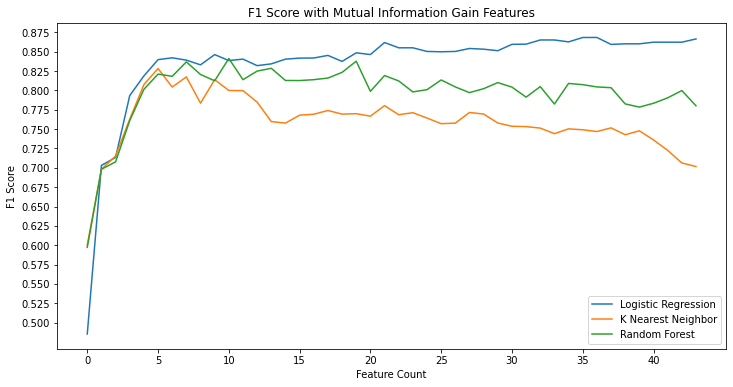

In [9]:
# Visual representation of the performance of all three machine learning algorithms

plt.figure(figsize=(12,6))
plt.title("F1 Score with Mutual Information Gain Features")
plt.xlabel("Feature Count")
plt.ylabel("F1 Score")
xticks(np.arange(0,45, step=5))
yticks(np.arange(.50, .95, step=0.025))
plt.plot(resultsLR, label = "Logistic Regression")
plt.plot(resultsKNN, label = "K Nearest Neighbor")
plt.plot(resultsRF, label = "Random Forest")
plt.legend()
plt.show()

# ANOVA F-test Features

In [10]:
featuresFC.head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,#a-tA-S,BB_P,BB,...,HBP_P,SH,CS,Ch,3B,BPF,GF,SO,GDP,Playoffs
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.45,0.429180,0.465585,...,0.175247,0.404816,0.246236,0.621987,0.172537,0.547619,0.555251,0.207712,0.625415,0
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.65,0.154861,0.410213,...,0.058972,0.481526,0.302859,0.609655,0.344682,0.404762,0.306162,0.376993,0.443133,0
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.75,0.429180,0.440077,...,0.313891,0.412176,0.201055,0.594857,0.412642,0.476190,0.466301,0.294791,0.414272,0
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.40,0.688073,0.021753,...,0.196577,0.485779,0.264308,0.570052,0.299651,0.190476,0.366232,0.286874,0.562072,0
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.60,0.204570,0.540521,...,0.258242,0.489978,0.351948,0.821312,0.493763,0.571429,0.403437,0.247071,0.564103,0


In [11]:
# The above steps are repeated for the ranked features from the ANOVA f-test selection algorithm

xFC = featuresFC.iloc[:,0:-1]
yFC = featuresFC['Playoffs']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(xFC, yFC, test_size=.2, random_state=1, stratify=yFC)

In [13]:
resultsLR_FC = []
for i in range(1,45):
  score = cross_val_score(LogisticRegression(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsLR_FC.append(np.mean(score))

In [14]:
resultsKNN_FC = []
for i in range(1,45):
  score = cross_val_score(KNeighborsClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsKNN_FC.append(np.mean(score))

In [15]:
resultsRF_FC = []
for i in range(1,45):
  score = cross_val_score(RandomForestClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsRF_FC.append(np.mean(score))

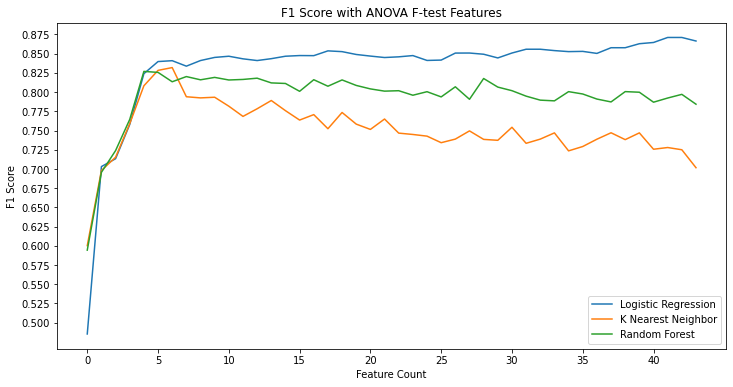

In [16]:
plt.figure(figsize=(12,6))
plt.title("F1 Score with ANOVA F-test Features")
plt.xlabel("Feature Count")
plt.ylabel("F1 Score") 
xticks(np.arange(0,45, step=5))
yticks(np.arange(.50, .95, step=0.025))
plt.plot(resultsLR_FC, label = "Logistic Regression")
plt.plot(resultsKNN_FC, label = "K Nearest Neighbor")
plt.plot(resultsRF_FC, label = "Random Forest")
plt.legend()
plt.show()

# Random Forest Features

In [17]:
featuresRFC.head()

,ERA+,RA/G,1Run,R/G,OPS+,SV,H_P,BB_P,BB,DefEff,...,#Bat,GDP,GF,SH,WP,3B,BK,BPF,CS,Playoffs
0,0.173913,0.477612,0.559387,0.339394,0.44,0.302094,0.622353,0.429180,0.465585,0.602041,...,0.175,0.625415,0.555251,0.404816,0.687796,0.172537,0.110017,0.547619,0.246236,0
1,0.637681,0.000000,0.390805,0.133333,0.32,0.194577,0.181001,0.154861,0.410213,1.000000,...,0.075,0.443133,0.306162,0.481526,0.262041,0.344682,0.027683,0.404762,0.302859,0
2,0.231884,0.300995,0.641762,0.363636,0.56,0.265422,0.464920,0.429180,0.440077,0.581633,...,0.225,0.414272,0.466301,0.412176,0.221357,0.412642,0.027504,0.476190,0.201055,0
3,0.275362,0.161692,0.618774,0.000000,0.36,0.100396,0.159225,0.688073,0.021753,0.867347,...,0.275,0.562072,0.366232,0.485779,0.435667,0.299651,0.041256,0.190476,0.264308,0
4,0.594203,0.208955,0.392720,0.442424,0.46,0.390013,0.482468,0.204570,0.540521,0.663265,...,0.300,0.564103,0.403437,0.489978,0.218771,0.493763,0.054656,0.571429,0.351948,0


In [18]:
# The above steps are repeated for the ranked features from the Random Forest selection algorithm

xRFC = featuresRFC.iloc[:,0:-1]
yRFC = featuresRFC['Playoffs']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(xRFC, yRFC, test_size=.2, random_state=1, stratify=yRFC)

In [20]:
resultsLR_RFC = []
for i in range(1,45):
  score = cross_val_score(LogisticRegression(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsLR_RFC.append(np.mean(score))

In [21]:
resultsKNN_RFC = []
for i in range(1,45):
  score = cross_val_score(KNeighborsClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsKNN_RFC.append(np.mean(score))

In [22]:
resultsRF_RFC = []
for i in range(1,45):
  score = cross_val_score(RandomForestClassifier(), X_train.iloc[:, 0:i], y_train, scoring='f1', cv=10)
  resultsRF_RFC.append(np.mean(score))

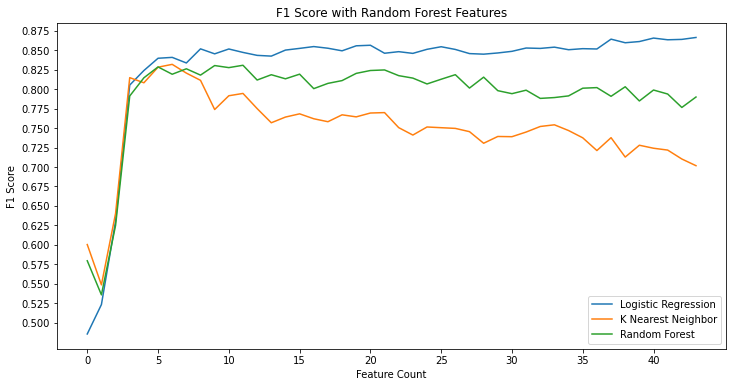

In [23]:
plt.figure(figsize=(12,6))
plt.title("F1 Score with Random Forest Features")
plt.xlabel("Feature Count")
plt.ylabel("F1 Score")  
xticks(np.arange(0,45, step=5))
yticks(np.arange(.50, .95, step=0.025))
plt.plot(resultsLR_RFC, label = "Logistic Regression")
plt.plot(resultsKNN_RFC, label = "K Nearest Neighbor")
plt.plot(resultsRF_RFC, label = "Random Forest")
plt.legend()
plt.show()